# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [157]:
#!pip install --upgrade numpy==1.26.4
#!pip install --upgrade pandas==2.2.2
#!pip install --upgrade nltk==3.9.1
#!pip install --upgrade spacy==3.7.5
#!pip install --upgrade scipy==1.12
#pip install --upgrade pydantic==2.10.5
#pip install wordcloud==1.9.4
#!python -m spacy download en_core_web_sm
#!pip install plotly
#!pip install tqdm
!pip install gensim

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/24.0 MB 975.2 kB/s eta 0:00:25
   - -------------------------------------- 0.7/24.0 MB 6.5 MB/s eta 0:00:04
   -- ------------------------------------- 1.6/24.0 MB 10.4 MB/s eta 0:00:03
   --- ------------------------------------ 2.3/24.0 MB 11.5 MB/s eta 0:00:02
   ---- ----------------------------------- 3.0/24.0 MB 12.8 MB/s eta 0:00:02
   ------- -------------------------------- 4.4/24.0 MB 14.9 MB/s eta 0:00:02
   -------- ------------------------------- 5.2/24.0 MB 15.2 MB/s eta 0:00:02
   --------- ------------------------------ 5.7/24.0 MB 15.2 MB/s eta 0:00:02
   ---------- ----------------------------- 6.5/24.0 MB 14.9 MB/s eta 0:00:02
   ------------ --------------------------- 7.3/24.0 MB 15.6 MB/s eta 0:00:02
   ------------- -------------------------- 8.0/24.0 MB 15.1 MB/s eta 0:00:02
  

## Importing the necessary libraries

In [3]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [ ]:
## Change the display properties of pandas to max
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
pd.reset_option("all")

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [ ]:
# Import the first file - True.csv
df_true = pd.read_csv("True.csv")
df_fake = pd.read_csv(r"C:\Users\ankita\Desktop\IIITB\COURSE 5- NLP\Semantic Classification Assignment\Starter+Notebook+++Data\Fake.csv")
# Import the second file - Fake.csv


## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [ ]:
# Inspect the DataFrame with True News to understand the given data
df_true.head()
df_true.info()
df_true.describe()
print("Shape:", df_true.shape)

In [ ]:
# Inspect the DataFrame with Fake News to understand the given data
df_fake.head()
df_fake.info()
df_fake.describe()
print("Shape:", df_fake.shape)

In [ ]:
# Print the column details for True News DataFrame
print(df_true.columns)

In [ ]:
# Print the column details for Fake News Dataframe
print(df_fake.columns)

In [ ]:
# Print the column names of both DataFrames
print(df_true.columns)
print(df_fake.columns)

### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [ ]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
df_true['news_label']=1
# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
df_fake['news_label']=0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [ ]:
# Combine the true and fake news DataFrames into a single DataFrame
df_all = pd.concat([df_true, df_fake], ignore_index = True)

In [ ]:
# Display the first 5 rows of the combined DataFrame to verify the result
df_all.head()

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [ ]:
# Check Presence of Null Values
df_all.isnull().sum()

In [ ]:
# Handle Rows with Null Values
df_all = df_all.dropna().reset_index(drop=True)

### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [ ]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
df_all['news_text'] = df_all['title'].astype(str) + '' + df_all['text'].astype(str) 
# Drop the irrelevant columns from the DataFrame as they are no longer needed
df_all=df_all.drop(columns=['title','text','date'])
# Display the first 5 rows of the updated DataFrame to check the result
df_all.head()

## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [ ]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = df_all[['news_text', 'news_label']].copy()
# Add 'news_label' column to the new dataframe for topic identification
df_clean.head()

#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [ ]:
import re
import string
# Write the function here to clean the text and remove all the unnecessary elements
def clean_text(text):
# Convert to lower case
    text=text.lower()
# Remove text in square brackets
    text= re.sub(r'\[.*?\]','',text)
# Remove punctuation
    text= text.translate(str.maketrans('','',string.punctuation))
# Remove words with numbers
    words = text.split()
    exceptions ={'covid19','b2b','g20'}
    cleaned_words = [
        word for word in words
        if (not any(char.isdigit() for char in word) or word in exceptions)
    ]

    return ' '.join(cleaned_words)


In [ ]:
df_clean.head()

#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [ ]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame
df_clean['news_text_cleaned'] = df_clean['news_text'].apply(clean_text)

In [ ]:
df_clean.head()

### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [ ]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

def lemmatize_and_filter(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    tagged = pos_tag(words)
    
    # Only keep nouns (NN, NNS) and not stopwords
    lemmatized_nouns = [
        lemmatizer.lemmatize(word, pos='n')
        for word, tag in tagged
        if (tag in ['NN', 'NNS']) and (word not in stop_words)
    ]
    return ' '.join(lemmatized_nouns)
    


In [ ]:
nltk.download()

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [ ]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame
from tqdm import tqdm
tqdm.pandas() 
#df_clean['news_text_lemmatized'] = df_clean['news_text_cleaned'].apply(lemmatize_and_filter)
df_clean['news_text_lemmatized'] = df_clean['news_text_cleaned'].progress_apply(lemmatize_and_filter)
#df_clean['news_text_lemmatized'] = df_clean['news_text_cleaned'].head(100).apply(lemmatize_and_filter)


### Save the Cleaned data as a csv file (Recommended)

In [5]:
## Recommended to perform the below steps to save time while rerunning the code
#df_clean.to_csv("clean_df.csv", index=False)
df_clean = pd.read_csv("clean_df.csv")

In [6]:
# Check the first few rows of the DataFrame
df_clean.head()

news_text  news_label  \
0  As U.S. budget fight looms, Republicans flip t...           1   
1  U.S. military to accept transgender recruits o...           1   
2  Senior U.S. Republican senator: 'Let Mr. Muell...           1   
3  FBI Russia probe helped by Australian diplomat...           1   
4  Trump wants Postal Service to charge 'much mor...           1   

                                   news_text_cleaned  \
0  as us budget fight looms republicans flip thei...   
1  us military to accept transgender recruits on ...   
2  senior us republican senator let mr mueller do...   
3  fbi russia probe helped by australian diplomat...   
4  trump wants postal service to charge much more...   

                                news_text_lemmatized  \
0  budget fight republican scriptwashington head ...   
1  transgender recruit pentagonwashington reuters...   
2  senator jobwashington counsel investigation li...   
3  fbi russia probe diplomat nytwashington reuter...   
4  trump service shipmentsseattlewashington reute...   

   cleaned_text_char_length  lemmatized_text_char_length  
0                    4546.0                       1734.0  
1                    4032.0                       1648.0  
2                    2776.0                       1156.0  
3                    2452.0                       1028.0  
4                    5036.0                       2017.0

In [7]:
# Check the dimensions of the DataFrame
df_clean.shape

(44898, 6)

In [8]:
# Check the number of non-null entries and data types of each column
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   news_text                    44898 non-null  object 
 1   news_label                   44898 non-null  int64  
 2   news_text_cleaned            44889 non-null  object 
 3   news_text_lemmatized         44889 non-null  object 
 4   cleaned_text_char_length     44889 non-null  float64
 5   lemmatized_text_char_length  44889 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.1+ MB


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [10]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_clean, test_size=0.3, random_state=42, stratify=df_clean['news_label'])

## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [17]:
# Add a new column to calculate the character length of cleaned news text
df_clean['cleaned_text_char_length'] = df_clean['news_text_cleaned'].str.len()
# Add a new column to calculate the character length of lemmatized news text with POS tags removed
df_clean['lemmatized_text_char_length'] = df_clean['news_text_lemmatized'].str.len()

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

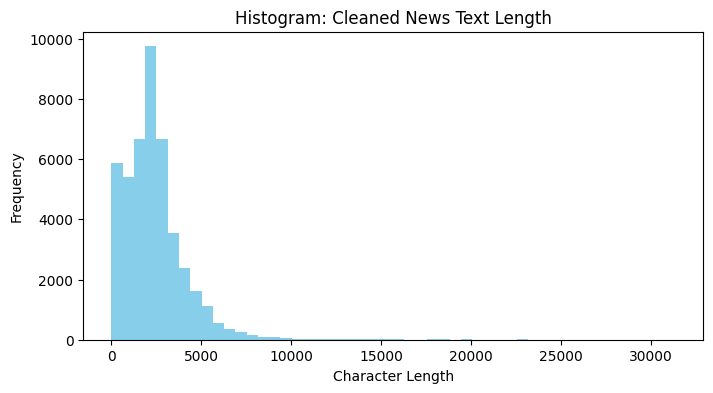

In [22]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text
plt.figure(figsize=(8,4))
plt.hist(df_clean['cleaned_text_char_length'], bins=50, color='skyblue')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.title('Histogram: Cleaned News Text Length')
plt.show()
# Add histogram for lemmatized news text with POS tags removed
plt.figure(figsize=(8,4))
plt.hist(df_clean['lemmatized_text_char_length'], bins=50, color='salmon')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.title('Histogram: Lemmatized News Text Length')
plt.show()

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

In [26]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text
from collections import Counter
true_news = df_train[df_train['news_label'] == 1]['news_text_lemmatized'].astype(str)
text_true = ' '.join(true_news)
words_true = text_true.split()
word_counts_true = Counter(words_true)
top_40_true_words = [word for word, count in word_counts_true.most_common(40)]
print(top_40_true_words)

# Filter news with label 1 (True News) and convert to it string and handle any non-string values
true_news = df_train[df_train['news_label'] == 1]['news_text_lemmatized'].astype(str)
text_true = ' '.join(true_news)
# Generate word cloud for True News
from wordcloud import WordCloud
wordcloud_true = WordCloud(width=800, height=400, max_words=40, background_color='white').generate(text_true)

['trump', 'state', 'president', 'reuters', 'government', 'year', 'house', '”', 'people', 'party', 'election', 'country', '“', 'official', 'campaign', 'group', 'court', 'leader', 'security', 'week', 'tax', 'minister', 'clinton', 'law', 'time', 'month', 'administration', 'percent', 'statement', 'bill', 'policy', 'vote', 'day', 'committee', 'office', 'plan', 'democrat', 'member', 'china', 'agency']


##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

In [28]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text
fake_news = df_train[df_train['news_label'] == 0]['news_text_lemmatized'].astype(str)
text_fake = ' '.join(fake_news)
words_fake = text_fake.split()
word_counts_fake = Counter(words_fake)
top_40_fake_words = [word for word, count in word_counts_fake.most_common(40)]
print(top_40_fake_words)

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
fake_news = df_train[df_train['news_label'] == 0]['news_text_lemmatized'].astype(str)
text_fake = ' '.join(fake_news)
# Generate word cloud for Fake News
wordcloud_fake = WordCloud(width=800, height=400, max_words=40, background_color='white').generate(text_fake)

['trump', 'president', 'people', 'state', 'clinton', 'time', 'year', 'news', 'image', 'obama', 'woman', 'campaign', 'house', 'medium', 'country', 'way', 'day', 'election', 'thing', 'government', 'video', 'law', 'party', 'police', 'group', 'fact', 'donald', 'bill', 'world', 'right', 'america', 'man', 'report', 'story', 'family', 'week', 'member', 'candidate', 'american', 'life']


### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [31]:
# Write a function to get the specified top n-grams
def get_top_ngrams(text_series, ngram_range=(2, 2), top_n=20):
    ngrams_list = []
    for text in text_series.dropna().astype(str):
        words = text.split()
        for n in range(ngram_range[0], ngram_range[1] + 1):
            ngrams = zip(*[words[i:] for i in range(n)])
            ngrams_list.extend([' '.join(ngram) for ngram in ngrams])
    return Counter(ngrams_list).most_common(top_n)

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [33]:
# Handle NaN values in the text data
df_train['news_text_lemmatized'] = df_train['news_text_lemmatized'].fillna('')

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

[('trump', 33339), ('state', 25403), ('president', 19187), ('reuters', 16730), ('government', 13907), ('year', 13143), ('house', 12731), ('”', 11311), ('people', 10920), ('party', 10458)]


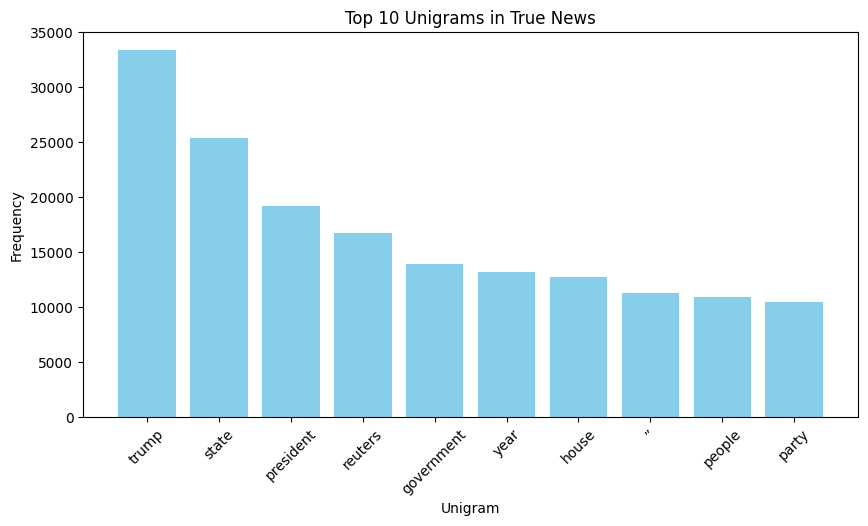

In [36]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
top_10_unigrams_true = get_top_ngrams(
    df_train[df_train['news_label'] == 1]['news_text_lemmatized'],
    ngram_range=(1, 1),
    top_n=10
)
print(top_10_unigrams_true)

# Plot the top 10 unigrams using a bar graph
import matplotlib.pyplot as plt

words, counts = zip(*top_10_unigrams_true)
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Unigram')
plt.ylabel('Frequency')
plt.title('Top 10 Unigrams in True News')
plt.xticks(rotation=45)
plt.show()

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [38]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
top_10_bigrams_true = get_top_ngrams(
    df_train[df_train['news_label'] == 1]['news_text_lemmatized'],
    ngram_range=(2, 2),
    top_n=10
)
print(top_10_bigrams_true)

# Plot the top 10 bigrams using a bar graph
bigrams, counts = zip(*top_10_bigrams_true)
plt.figure(figsize=(10, 5))
plt.bar(bigrams, counts, color='orange')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.title('Top 10 Bigrams in True News')
plt.xticks(rotation=45)
plt.show()

[('donald trump', 2064), ('barack obama', 1986), ('president barack', 1934), ('president trump', 1884), ('reuters president', 1873), ('president donald', 1773), ('secretary state', 1654), ('house representative', 1627), ('trump campaign', 1413), ('state department', 1380)]


##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



[('president barack obama', 1743), ('president donald trump', 790), ('reuters president trump', 586), ('secretary state rex', 481), ('president vladimir putin', 464), ('state rex tillerson', 460), ('speaker paul ryan', 368), ('leader mitch mcconnell', 344), ('chancellor angela merkel', 316), ('majority leader mitch', 312)]


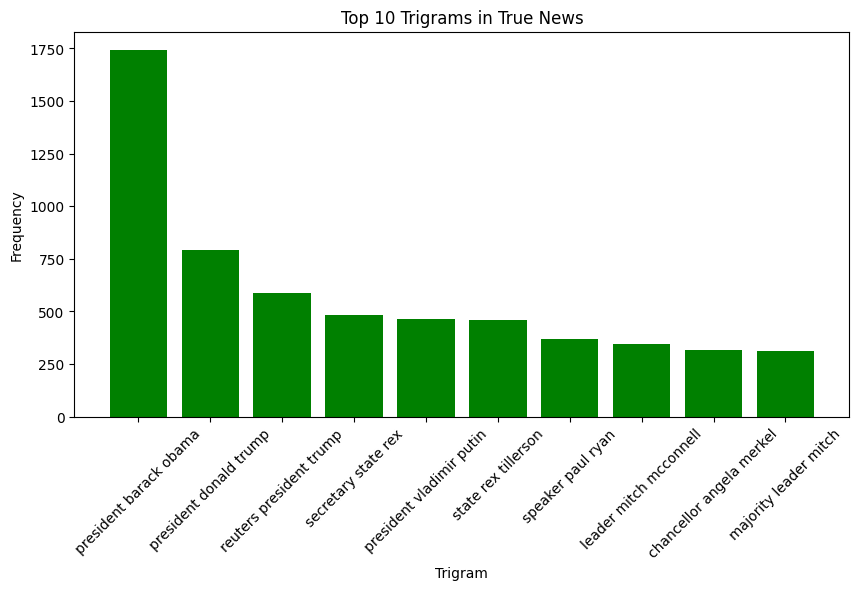

In [40]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
top_10_trigrams_true = get_top_ngrams(
    df_train[df_train['news_label'] == 1]['news_text_lemmatized'],
    ngram_range=(3, 3),
    top_n=10
)
print(top_10_trigrams_true)

# Plot the top 10 trigrams using a bar graph
trigrams, counts = zip(*top_10_trigrams_true)
plt.figure(figsize=(10, 5))
plt.bar(trigrams, counts, color='green')
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.title('Top 10 Trigrams in True News')
plt.xticks(rotation=45)
plt.show()


### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

[('trump', 46592), ('president', 18789), ('people', 18282), ('state', 14670), ('clinton', 12545), ('time', 12362), ('year', 10268), ('news', 10099), ('image', 9654), ('obama', 8527)]


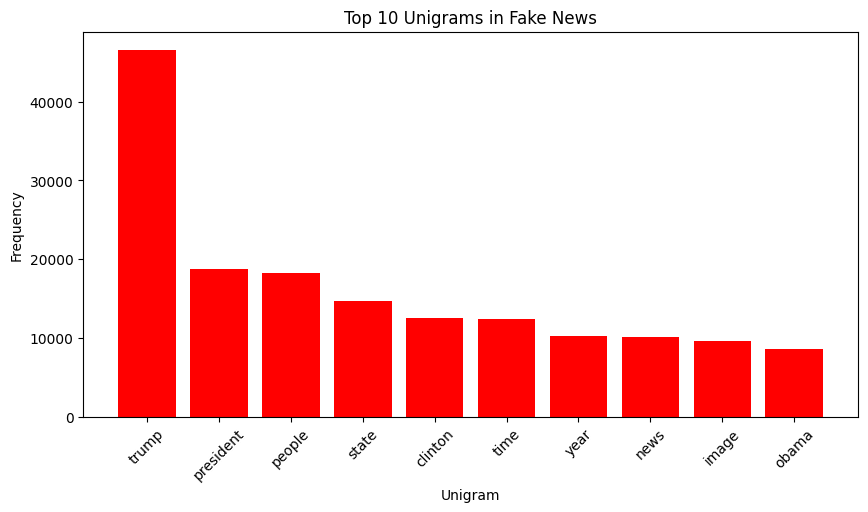

In [43]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
top_10_unigrams_fake = get_top_ngrams(
    df_train[df_train['news_label'] == 0]['news_text_lemmatized'],
    ngram_range=(1, 1),
    top_n=10
)
print(top_10_unigrams_fake)

# Plot the top 10 unigrams using a bar graph
words, counts = zip(*top_10_unigrams_fake)
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='red')
plt.xlabel('Unigram')
plt.ylabel('Frequency')
plt.title('Top 10 Unigrams in Fake News')
plt.xticks(rotation=45)
plt.show()


##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



[('president trump', 2811), ('donald trump', 2684), ('president obama', 1818), ('trump campaign', 1375), ('trump supporter', 1302), ('century wire', 1297), ('barack obama', 1244), ('state department', 1127), ('trump realdonaldtrump', 1107), ('secretary state', 1103)]


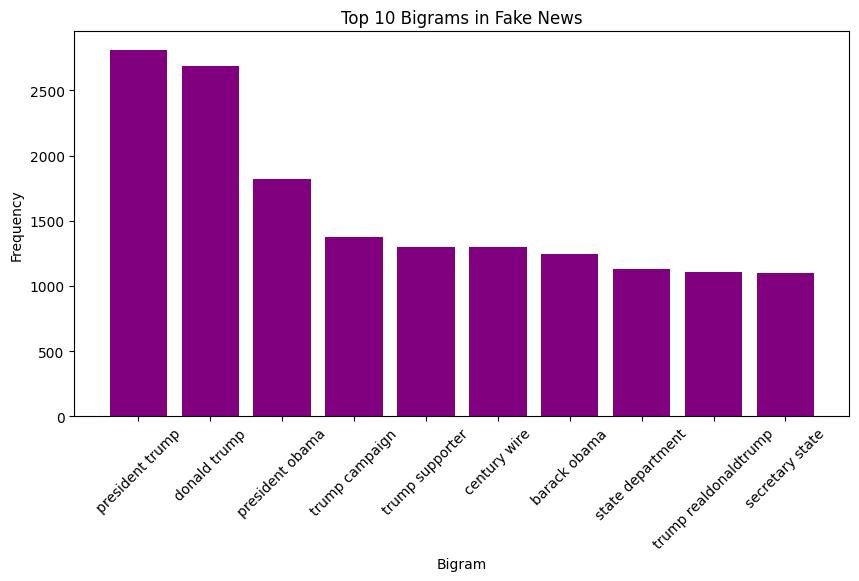

In [45]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
top_10_bigrams_fake = get_top_ngrams(
    df_train[df_train['news_label'] == 0]['news_text_lemmatized'],
    ngram_range=(2, 2),
    top_n=10
)
print(top_10_bigrams_fake)

# Plot the top 10 bigrams using a bar graph
bigrams, counts = zip(*top_10_bigrams_fake)
plt.figure(figsize=(10, 5))
plt.bar(bigrams, counts, color='purple')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.title('Top 10 Bigrams in Fake News')
plt.xticks(rotation=45)
plt.show()


##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [47]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
top_10_trigrams_fake = get_top_ngrams(
    df_train[df_train['news_label'] == 0]['news_text_lemmatized'],
    ngram_range=(3, 3),
    top_n=10
)
print(top_10_trigrams_fake)

# Plot the top 10 trigrams using a bar graph
trigrams, counts = zip(*top_10_trigrams_fake)
plt.figure(figsize=(10, 5))
plt.bar(trigrams, counts, color='teal')
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.title('Top 10 Trigrams in Fake News')
plt.xticks(rotation=45)
plt.show()


[('j trump realdonaldtrump', 783), ('donald j trump', 626), ('news century wire', 621), ('president barack obama', 506), ('image video screen', 436), ('video screen capture', 411), ('president donald trump', 215), ('department homeland security', 202), ('image chip image', 177), ('house press secretary', 175)]


## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [ ]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [ ]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [ ]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [ ]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [ ]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
import gensim.downloader as api

#w2v_model = api.load("word2vec-google-news-300")
from gensim.models import KeyedVectors

model_path = r"C:\Users\ankita\Desktop\IIITB\COURSE 5- NLP\Semantic Classification Assignment\Starter+Notebook+++Data\GoogleNews-vectors-negative300.bin\GoogleNews-vectors-negative300.bin"  # Update path if needed
w2v_model = KeyedVectors.load_word2vec_format(model_path, binary=True)


In [62]:
df_train['news_text_lemmatized'] = df_train['news_text_lemmatized'].fillna('')
df_test['news_text_lemmatized'] = df_test['news_text_lemmatized'].fillna('')

### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [64]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
def get_average_w2v_vector(text, model, vector_size=300):
    words = text.split()
    vectors = [model[word] for word in words if word in model]
    if len(vectors) == 0:
        return np.zeros(vector_size)
    else:
        return np.mean(vectors, axis=0)

# For train data
X_train_w2v = np.vstack(df_train['news_text_lemmatized'].apply(lambda x: get_average_w2v_vector(x, w2v_model)).values)

# For validation data
X_test_w2v = np.vstack(df_test['news_text_lemmatized'].apply(lambda x: get_average_w2v_vector(x, w2v_model)).values)

## Extract the target variable for the training data and validation data
y_train = df_train['news_label'].values
y_test = df_test['news_label'].values

## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [68]:
## Initialise Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
## Train Logistic Regression model on training data
logreg.fit(X_train_w2v, y_train)
## Predict on validation data
y_pred = logreg.predict(X_test_w2v)

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [70]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# Print metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")

Accuracy:  0.9299
Precision: 0.9216
Recall:    0.9325
F1-score:  0.9270


In [72]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      7045
           1       0.92      0.93      0.93      6425

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [74]:
## Initialise Decision Tree model
dtree = DecisionTreeClassifier(random_state=42)
## Train Decision Tree model on training data
dtree.fit(X_train_w2v, y_train)
## Predict on validation data
y_pred_dt = dtree.predict(X_test_w2v)

##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [76]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Print metrics
print(f"Decision Tree Accuracy:  {accuracy_dt:.4f}")
print(f"Decision Tree Precision: {precision_dt:.4f}")
print(f"Decision Tree Recall:    {recall_dt:.4f}")
print(f"Decision Tree F1-score:  {f1_dt:.4f}")

Decision Tree Accuracy:  0.8458
Decision Tree Precision: 0.8494
Decision Tree Recall:    0.8226
Decision Tree F1-score:  0.8358


In [78]:
# Classification Report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      7045
           1       0.85      0.82      0.84      6425

    accuracy                           0.85     13470
   macro avg       0.85      0.84      0.85     13470
weighted avg       0.85      0.85      0.85     13470



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [80]:
## Initialise Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
## Train Random Forest model on training data
rf_model.fit(X_train_w2v, y_train)
## Predict on validation data
y_pred_rf = rf_model.predict(X_test_w2v)

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [82]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print metrics
print(f"Random Forest Accuracy:  {accuracy_rf:.4f}")
print(f"Random Forest Precision: {precision_rf:.4f}")
print(f"Random Forest Recall:    {recall_rf:.4f}")
print(f"Random Forest F1-score:  {f1_rf:.4f}")

Random Forest Accuracy:  0.9254
Random Forest Precision: 0.9317
Random Forest Recall:    0.9104
Random Forest F1-score:  0.9209


In [84]:
# Classification Report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      7045
           1       0.93      0.91      0.92      6425

    accuracy                           0.93     13470
   macro avg       0.93      0.92      0.93     13470
weighted avg       0.93      0.93      0.93     13470



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

# 8. Conclusion

In this assignment, we investigated semantic classification for detecting fake and true news articles. Our exploratory data analysis showed that **true news** typically contains formal, factual, and institution-related vocabulary, while **fake news** often uses sensational, emotional, or misleading language patterns. These differences were highlighted in word clouds and n-gram analyses, which revealed distinct lexical signatures for each class.

To address the classification problem, we used semantic processing techniques such as text cleaning, lemmatization, POS-tag filtering, and most importantly, Word2Vec embeddings to represent news articles in a way that captures their meaning and context. This allowed our models to learn patterns that go beyond surface-level word matching and account for semantic relationships.

We evaluated three supervised learning models: **Logistic Regression**, **Decision Tree**, and **Random Forest**. Both **Logistic Regression and Random Forest performed best**, each achieving an **F1-score of approximately 0.93**, while the Decision Tree lagged behind with an F1-score of 0.85.  
**The F1-score was chosen as the primary evaluation metric** to ensure an optimal balance between precision and recall, which is critical in fake news detection to minimize both false positives and false negatives.

In summary, semantic classification using word embeddings significantly improved our ability to detect fake news by leveraging deeper contextual cues in text. This approach led to high classification performance and demonstrated strong potential for real-world applications in misinformation detection and content verification.
